In [ ]:
#프로젝트 목표 : 다음 분기에 어떤 게임을 설계해야 할까
#회사의 규모 : 한 지역만 투자 가능
#진출 지역: 북아메리카 - 데이터가 가장 많고, 영어를 사용해서 영어를 사용하는 글로벌한 유저들에게 모두 접근 가능. 다른 지역의 경우 언어 문제가 커서 번역으로 인한 추가적인 비용 발생(특히 유럽)
#다음 분기 : 2021년 1분기(데이터셋의 바로 다음 분기)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [139]:
import pandas as pd
import numpy as np

df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [140]:
df.describe()

,Unnamed: 0,Year
count,16598.000000,16327.000000
mean,8299.500000,1994.242543
std,4791.574219,155.077168
min,1.000000,0.000000
25%,4150.250000,2003.000000
50%,8299.500000,2007.000000
75%,12448.750000,2010.000000
max,16598.000000,2020.000000


In [141]:
#불필요한 열 제거
df = df.drop(['Unnamed: 0'], axis=1)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [143]:
# 결측치 확인
# year의 결측치 : 1.63%(271개), 결측치를 없애기엔 2백만 이상의 출고량을 보이는 데이터값이 있고 갯수가 많아서 중앙값으로 처리
# publisher의 결측치 0.34%(58개), 게임 개발사 정보 자체는 크리티컬한 정보가 아니므로 'NaN'으로 처리
# genre의 결측치 : 0.3%(50개) - 'NaN'으로 처리

In [144]:
df[df['Year']<100]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0,0,0.02,0
16103,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0
16149,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [145]:
df['Year'].median()

2007.0

In [146]:
# Year 컬럼의 결측치 중앙값인 2007로 처리, 데이터타입 float -> int로 변경
# Year 컬럼의 이상치 처리
df['Year'] = df['Year'].fillna(2007)
df['Year'] = df['Year'].astype(int)

def year_outlier(x):
    if x < 17:
        return x + 2000
    elif x < 100:
        return x+1900
    else:
        return x
    
df['Year'] = df['Year'].apply(year_outlier)

# # Publisher, Genre 컬럼의 결측치 NaN으로 처리
# df['Publisher'] = df['Publisher'].fillna('NaN')
# df['Genre'] = df['Genre'].fillna('NaN')

In [147]:
df['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16598, dtype: int64

In [148]:
# 증복값 삭제

df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16597 non-null  object
 1   Platform     16597 non-null  object
 2   Year         16597 non-null  int64 
 3   Genre        16547 non-null  object
 4   Publisher    16539 non-null  object
 5   NA_Sales     16597 non-null  object
 6   EU_Sales     16597 non-null  object
 7   JP_Sales     16597 non-null  object
 8   Other_Sales  16597 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [149]:
# 동 데이터셋과 실제 데이터(지역별 출고량)를 비교해봤을 때, K,M은 각각 천명, 백만명 단위이며, 소수점은 100만명을 기준으로 계산된 것을 확인
# K는 제거 후 0.001 곱하고, M은 제거
# 데이터타입(str->float) 변경

def value_convert(x):
    if 'K' in x or 'M' in x:
        if 'K' in x:
            if len(x) > 1:
                return float(x.replace('K', '')) * 0.001
        elif 'M' in x:
            if len(x) > 1:
                return float(x.replace('M', ''))
    else:
        return float(x)

df['NA_Sales_converted'] = df['NA_Sales'].apply(value_convert)
df['EU_Sales_converted'] = df['EU_Sales'].apply(value_convert)
df['JP_Sales_converted'] = df['JP_Sales'].apply(value_convert)
df['Other_Sales_converted'] = df['Other_Sales'].apply(value_convert)

In [150]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA_Sales_converted,EU_Sales_converted,JP_Sales_converted,Other_Sales_converted
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01,0.15,0.04,0.00,0.01
16593,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0,0.01,0.00,0.00,0.00
16594,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.05,0.05,0.25,0.03


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   16597 non-null  object 
 1   Platform               16597 non-null  object 
 2   Year                   16597 non-null  int64  
 3   Genre                  16547 non-null  object 
 4   Publisher              16539 non-null  object 
 5   NA_Sales               16597 non-null  object 
 6   EU_Sales               16597 non-null  object 
 7   JP_Sales               16597 non-null  object 
 8   Other_Sales            16597 non-null  object 
 9   NA_Sales_converted     16597 non-null  float64
 10  EU_Sales_converted     16597 non-null  float64
 11  JP_Sales_converted     16597 non-null  float64
 12  Other_Sales_converted  16597 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.6+ MB


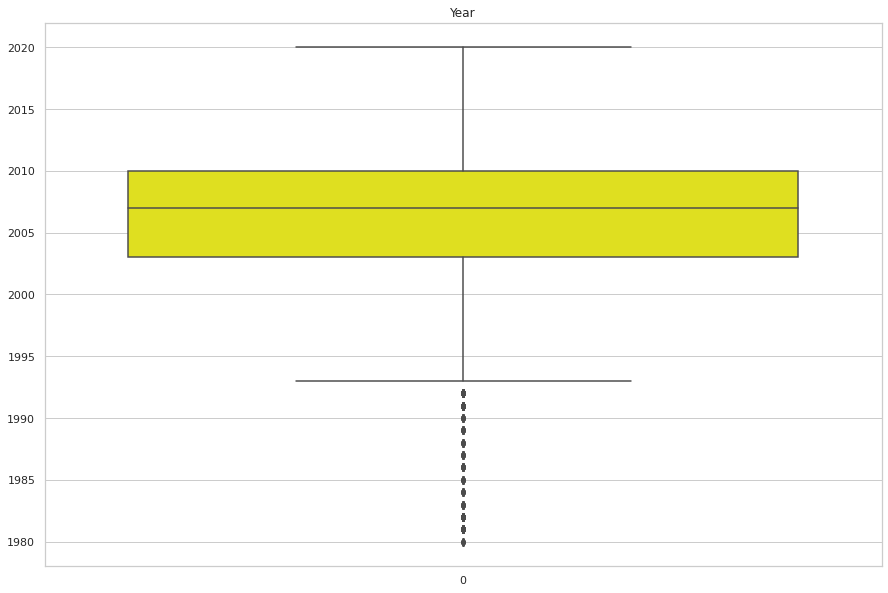

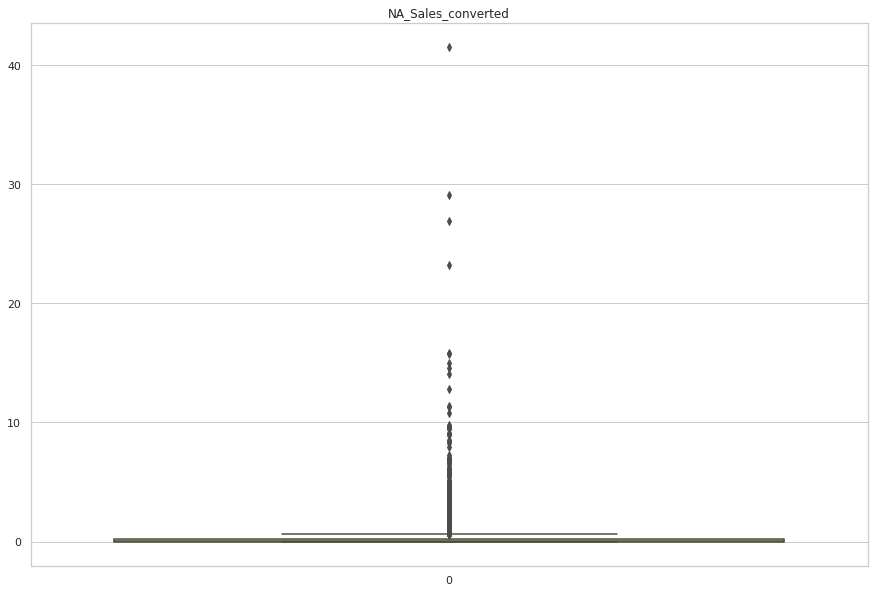

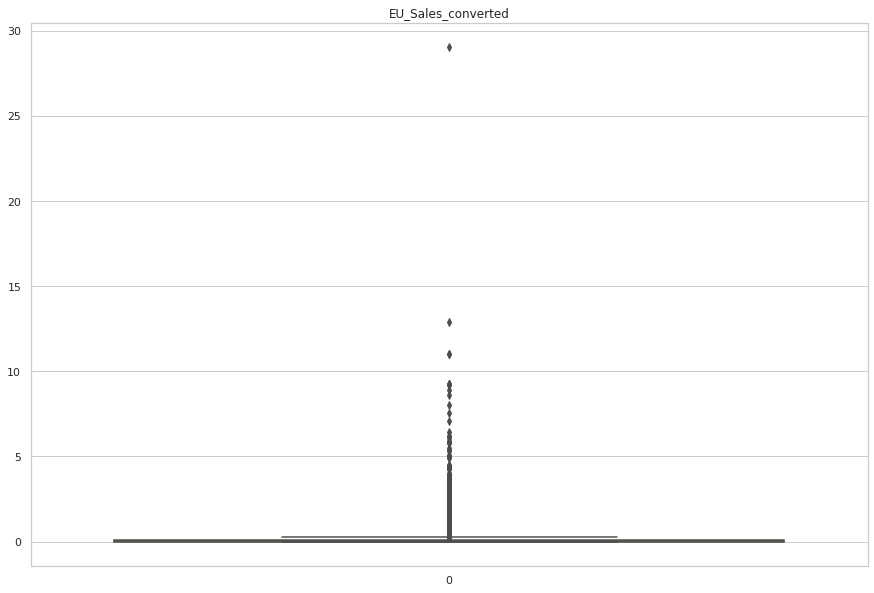

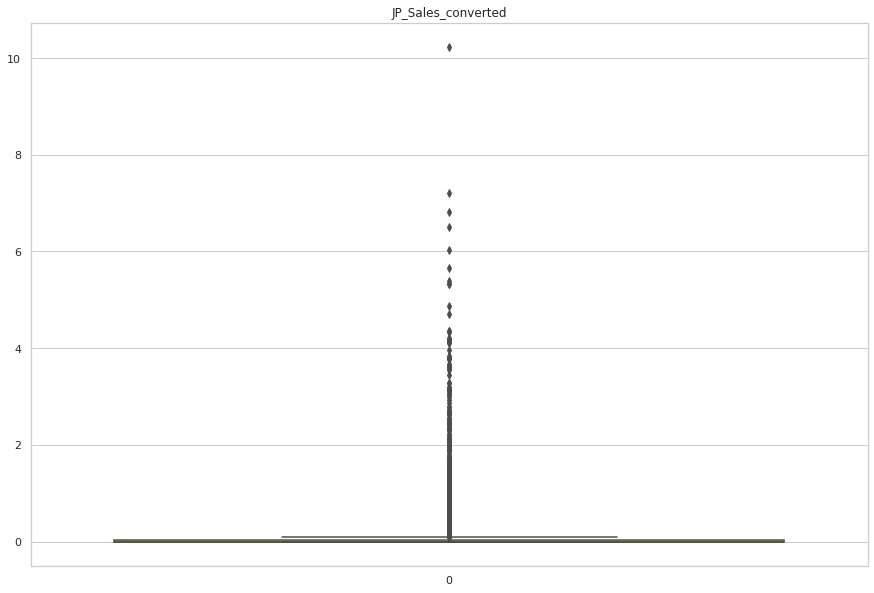

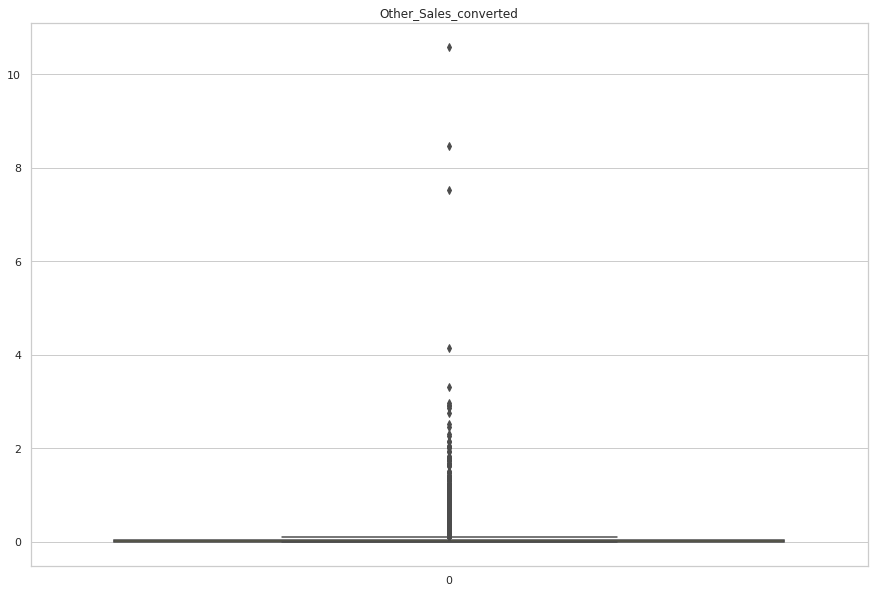

In [152]:
# 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df['Year'], color='yellow')
plt.title('Year')
plt.show()

sns.boxplot(data=df['NA_Sales_converted'], color='yellow')
plt.title('NA_Sales_converted')
plt.show()

sns.boxplot(data=df['EU_Sales_converted'], color='yellow')
plt.title('EU_Sales_converted')
plt.show()

sns.boxplot(data=df['JP_Sales_converted'], color='yellow')
plt.title('JP_Sales_converted')
plt.show()

sns.boxplot(data=df['Other_Sales_converted'], color='yellow')
plt.title('Other_Sales_converted')
plt.show()

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   16597 non-null  object 
 1   Platform               16597 non-null  object 
 2   Year                   16597 non-null  int64  
 3   Genre                  16547 non-null  object 
 4   Publisher              16539 non-null  object 
 5   NA_Sales               16597 non-null  object 
 6   EU_Sales               16597 non-null  object 
 7   JP_Sales               16597 non-null  object 
 8   Other_Sales            16597 non-null  object 
 9   NA_Sales_converted     16597 non-null  float64
 10  EU_Sales_converted     16597 non-null  float64
 11  JP_Sales_converted     16597 non-null  float64
 12  Other_Sales_converted  16597 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.6+ MB


In [154]:
df['NA_Sales_converted']

0        0.04
1        0.17
2        0.00
3        0.04
4        0.12
         ... 
16592    0.15
16593    0.01
16594    0.44
16595    0.05
16596    0.00
Name: NA_Sales_converted, Length: 16597, dtype: float64

In [155]:
#이상치 제거

na = pd.DataFrame(df['NA_Sales_converted'])
eu = pd.DataFrame(df['EU_Sales_converted'])
jp = pd.DataFrame(df['JP_Sales_converted'])
other = pd.DataFrame(df['Other_Sales_converted'])

def remove_outlier(df,columns):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3-q1
    boundary = 1.5*iqr
    
    index1 = df[df[columns] > q3+boundary].index
    index2 = df[df[columns] < q1-boundary].index 
    
    df[columns] = df[columns].drop(index1)
    df[columns] = df[columns].drop(index2)
    
    return df



na = remove_outlier(na,'NA_Sales_converted')
eu = remove_outlier(eu,'EU_Sales_converted')
jp = remove_outlier(jp,'JP_Sales_converted')
other = remove_outlier(other,'Other_Sales_converted')


# 이상치 처리 후 NaN으로 처리된 값을 전 열의 값으로 처리
df['na'] = na.fillna(method='ffill')
df['eu'] = eu.fillna(method='ffill')
df['jp'] = jp.fillna(method='ffill')
df['other'] = other.fillna(method='ffill')


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   16597 non-null  object 
 1   Platform               16597 non-null  object 
 2   Year                   16597 non-null  int64  
 3   Genre                  16547 non-null  object 
 4   Publisher              16539 non-null  object 
 5   NA_Sales               16597 non-null  object 
 6   EU_Sales               16597 non-null  object 
 7   JP_Sales               16597 non-null  object 
 8   Other_Sales            16597 non-null  object 
 9   NA_Sales_converted     16597 non-null  float64
 10  EU_Sales_converted     16597 non-null  float64
 11  JP_Sales_converted     16597 non-null  float64
 12  Other_Sales_converted  16597 non-null  float64
 13  na                     16597 non-null  float64
 14  eu                     16597 non-null  float64
 15  jp

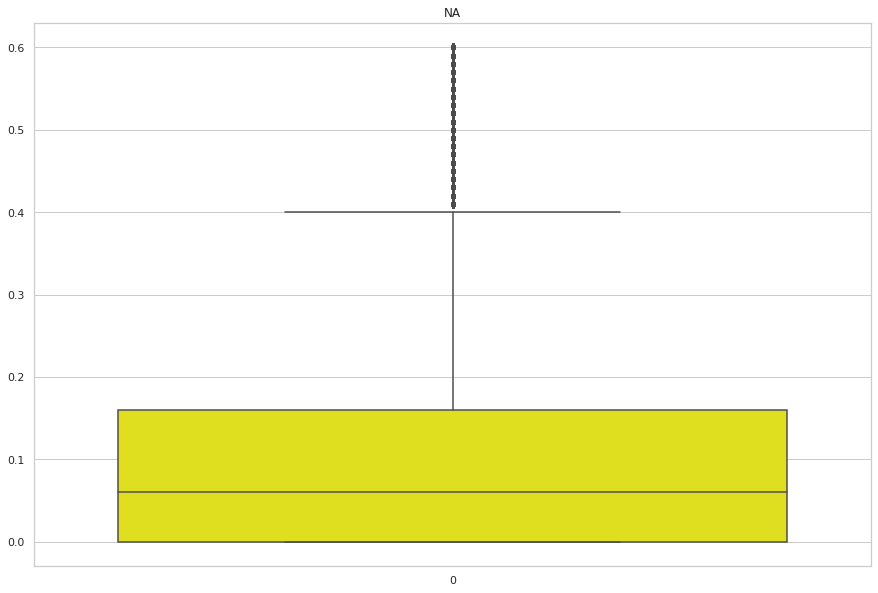

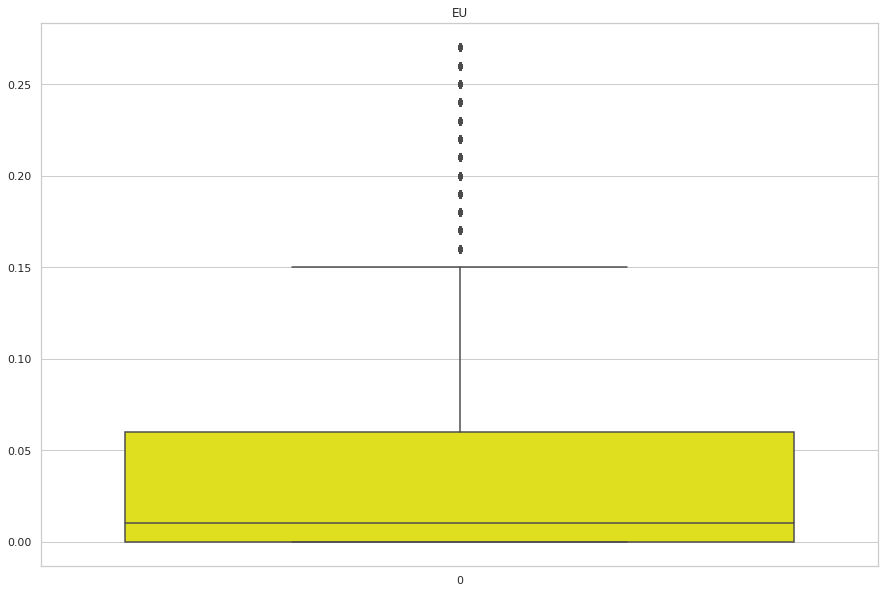

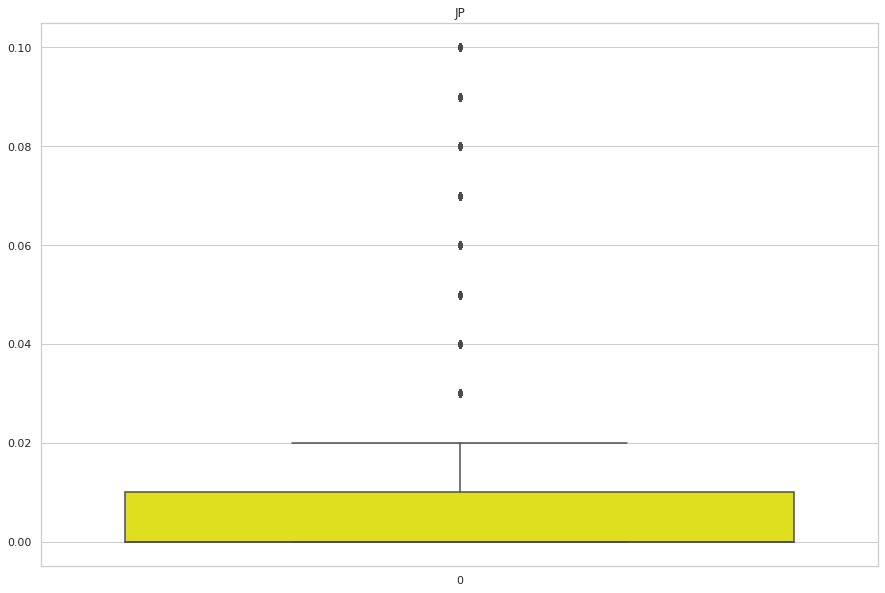

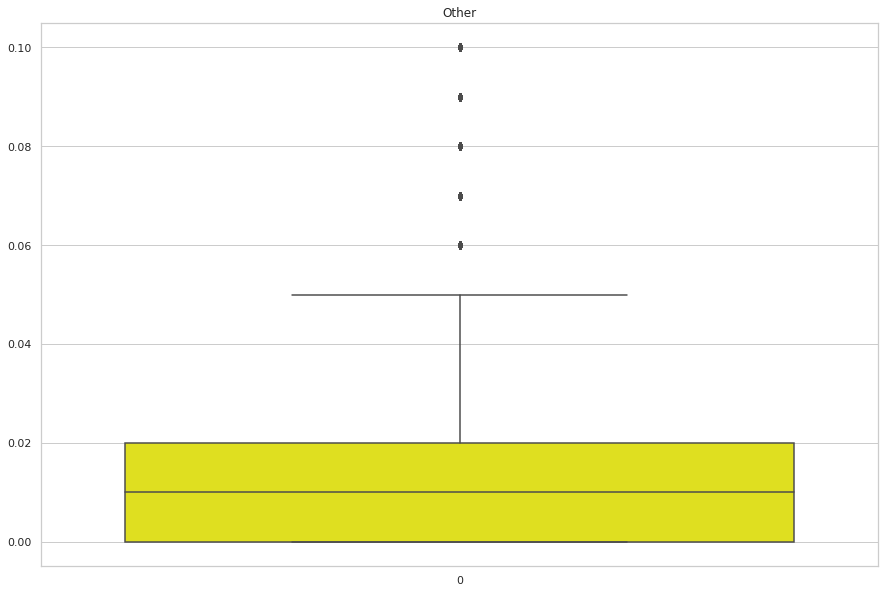

In [157]:
#이상치 제거 후 박스플롯
sns.boxplot(data=df['na'], color='yellow')
plt.title('NA')
plt.show()

sns.boxplot(data=df['eu'], color='yellow')
plt.title('EU')
plt.show()

sns.boxplot(data=df['jp'], color='yellow')
plt.title('JP')
plt.show()

sns.boxplot(data=df['other'], color='yellow')
plt.title('Other')
plt.show()

**데이터 분석**
1. 게임 시장 규모
*   게임 출고량(글로벌/지역별)
*   게임 출시 건수(글로벌/지역별)
2. 장르별 출고량
*   글로벌
*   지역별
3. 플랫폼별 출고량
*   글로벌
*   지역별

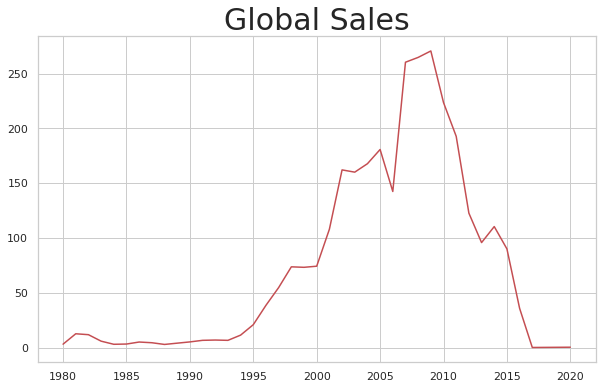

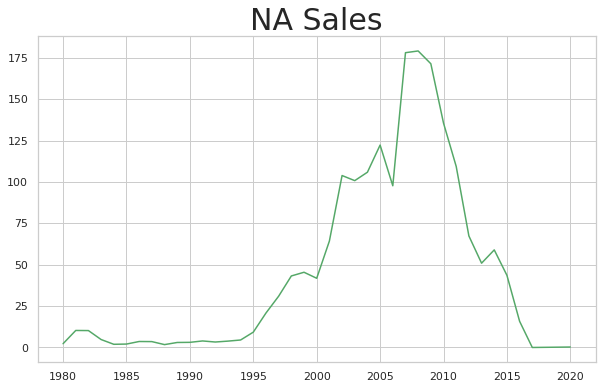

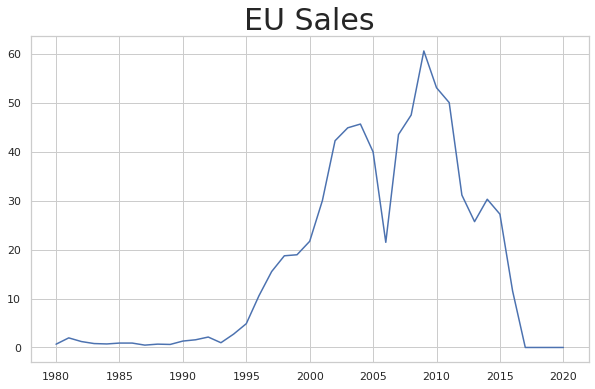

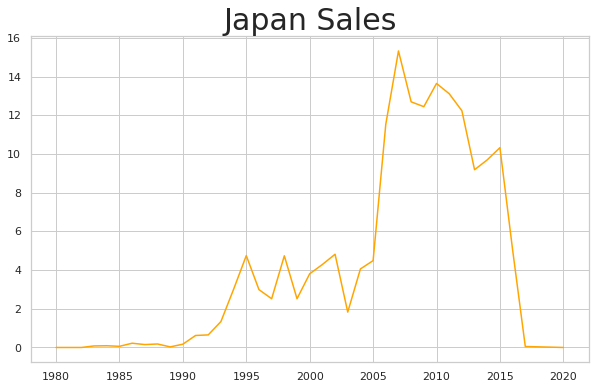

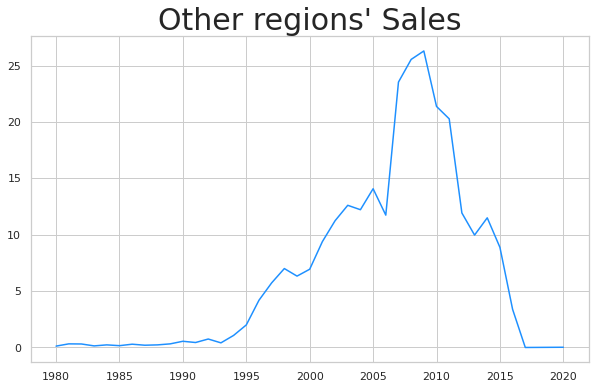

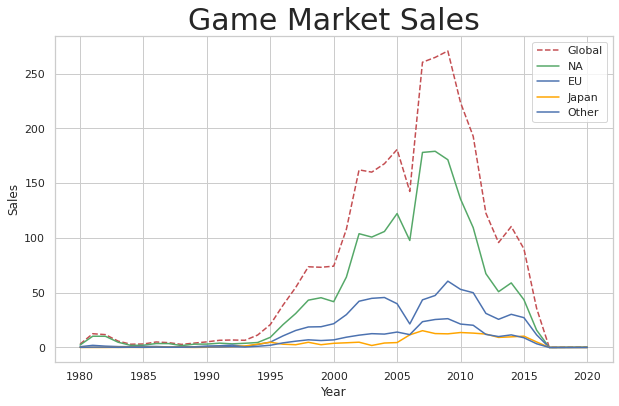

In [158]:
#게임 출고량

#글로벌 게임 출고량(모든 지역 출고량 더한) 컬럼 추가
df['global'] = df['na']+df['eu']+df['jp']+df['other']


#연도별 글로벌 게임 출고량
sales_per_year = pd.DataFrame(df.groupby('Year')['global'].sum())
sales_per_year.reset_index(inplace=True)

fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
plt.plot(sales_per_year['Year'], sales_per_year["global"], 'r')
plt.title('Global Sales', fontsize=30)
plt.show()


#연도별 북미 게임 출고량
sales_per_year_na = pd.DataFrame(df.groupby('Year')['na'].sum())
sales_per_year_na.reset_index(inplace=True)

fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
plt.plot(sales_per_year_na['Year'], sales_per_year_na["na"],'g')
plt.title('NA Sales', fontsize=30)
plt.show()

#연도별 유럽 게임 출고량
sales_per_year_eu = pd.DataFrame(df.groupby('Year')['eu'].sum())
sales_per_year_eu.reset_index(inplace=True)

fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
plt.plot(sales_per_year_eu['Year'], sales_per_year_eu["eu"], 'b')
plt.title('EU Sales', fontsize=30)
plt.show()

#연도별 일본 게임 출고량
sales_per_year_jp = pd.DataFrame(df.groupby('Year')['jp'].sum())
sales_per_year_jp.reset_index(inplace=True)

fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
plt.plot(sales_per_year_jp['Year'], sales_per_year_jp["jp"], color="orange")
plt.title('Japan Sales', fontsize=30)
plt.show()

#연도별 기타 지역 게임 출고량
sales_per_year_other = pd.DataFrame(df.groupby('Year')['other'].sum())
sales_per_year_other.reset_index(inplace=True)

fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
plt.plot(sales_per_year_other['Year'], sales_per_year_other["other"], color='dodgerblue')
plt.title("Other regions' Sales", fontsize=30)
plt.show()


#연도별 게임 출고량(전체)
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
plt.plot(sales_per_year['Year'], sales_per_year['global'], 'r', linestyle='--', label='Global')
plt.plot(sales_per_year_na['Year'], sales_per_year_na["na"],'g', label='NA')
plt.plot(sales_per_year_eu['Year'], sales_per_year_eu["eu"], 'b', label='EU')
plt.plot(sales_per_year_jp['Year'], sales_per_year_jp["jp"], color="orange", label='Japan')
plt.plot(sales_per_year_other['Year'], sales_per_year_other["other"], label='Other')
plt.title("Game Market Sales", fontsize=30)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   16597 non-null  object 
 1   Platform               16597 non-null  object 
 2   Year                   16597 non-null  int64  
 3   Genre                  16547 non-null  object 
 4   Publisher              16539 non-null  object 
 5   NA_Sales               16597 non-null  object 
 6   EU_Sales               16597 non-null  object 
 7   JP_Sales               16597 non-null  object 
 8   Other_Sales            16597 non-null  object 
 9   NA_Sales_converted     16597 non-null  float64
 10  EU_Sales_converted     16597 non-null  float64
 11  JP_Sales_converted     16597 non-null  float64
 12  Other_Sales_converted  16597 non-null  float64
 13  na                     16597 non-null  float64
 14  eu                     16597 non-null  float64
 15  jp

In [160]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA_Sales_converted,EU_Sales_converted,JP_Sales_converted,Other_Sales_converted,na,eu,jp,other,global
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0,0.04,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01,0.17,0.00,0.00,0.01,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0,0.04,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04,0.12,0.09,0.00,0.04,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01,0.15,0.04,0.00,0.01,0.15,0.04,0.00,0.01,0.20
16593,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01
16594,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.44,0.19,0.03,0.13,0.44,0.19,0.03,0.00,0.66
16595,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.05,0.05,0.25,0.03,0.05,0.05,0.03,0.03,0.16


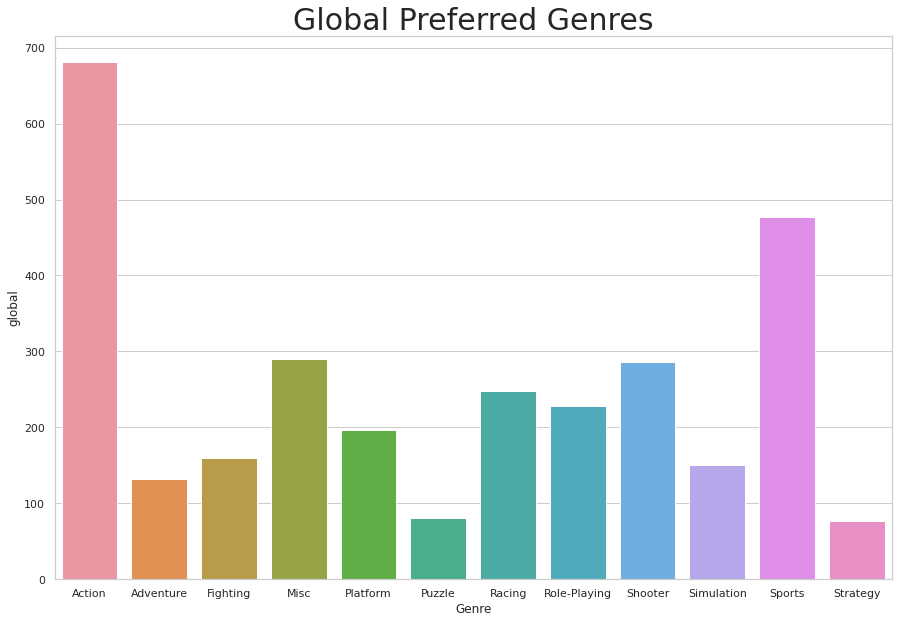

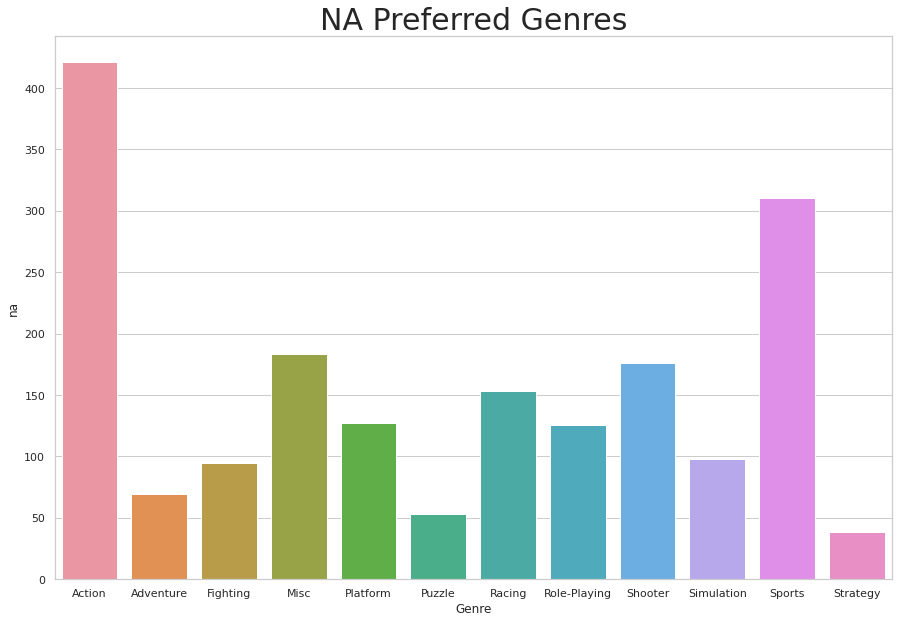

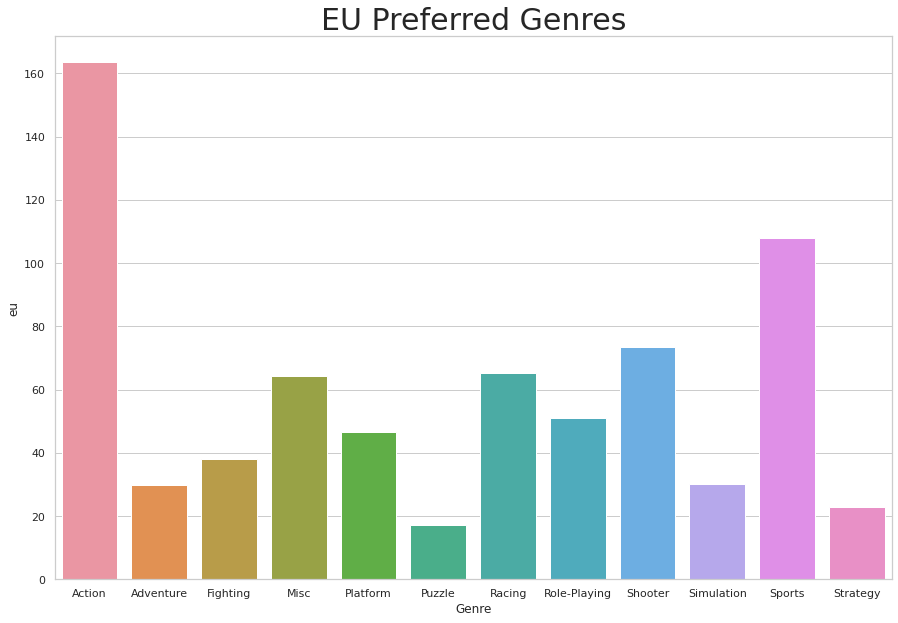

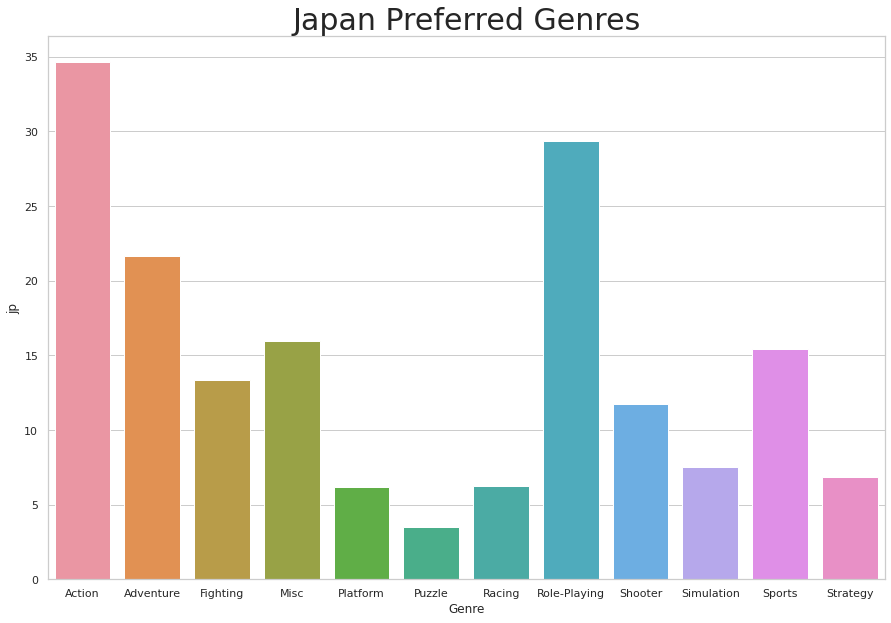

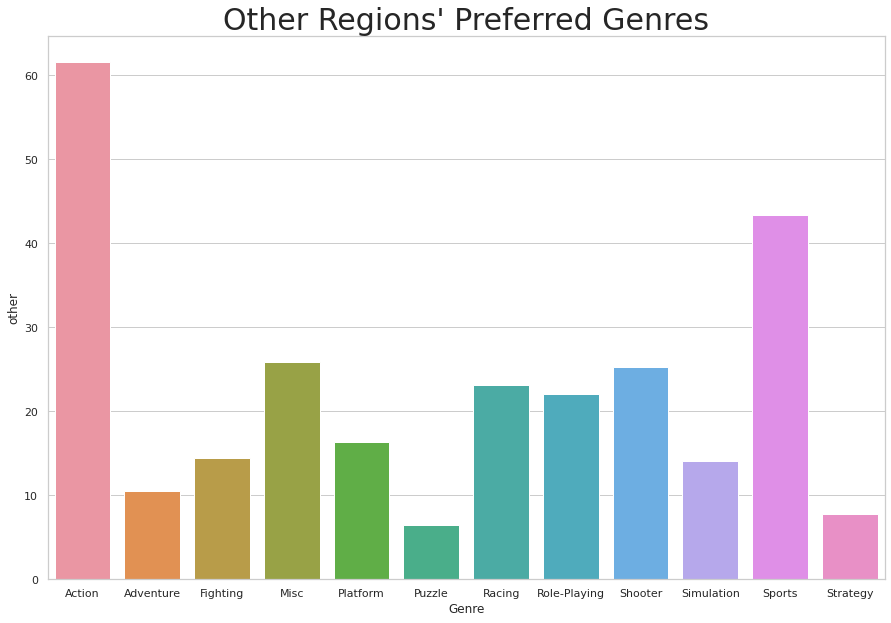

In [161]:
#지역별로 선호하는 게임 장르


#글로벌 게임 장르
genre = pd.DataFrame(df.groupby('Genre')['global'].sum())
genre.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=genre['Genre'], y=genre["global"])
plt.title('Global Preferred Genres', fontsize=30)
plt.show()


#북미 게임 장르
genre_na = pd.DataFrame(df.groupby('Genre')['na'].sum())
genre_na.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=genre_na['Genre'], y=genre_na["na"])
plt.title('NA Preferred Genres', fontsize=30)
plt.show()

#유럽 게임 장르
genre_eu = pd.DataFrame(df.groupby('Genre')['eu'].sum())
genre_eu.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=genre_eu['Genre'], y=genre_eu["eu"])
plt.title('EU Preferred Genres', fontsize=30)
plt.show()

#일본 게임 장르
genre_jp = pd.DataFrame(df.groupby('Genre')['jp'].sum())
genre_jp.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=genre_jp['Genre'], y=genre_jp["jp"])
plt.title('Japan Preferred Genres', fontsize=30)
plt.show()

#기타 지역 게임 장르
genre_other = pd.DataFrame(df.groupby('Genre')['other'].sum())
genre_other.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=genre_other['Genre'], y=genre_other["other"])
plt.title("Other Regions' Preferred Genres", fontsize=30)
plt.show()

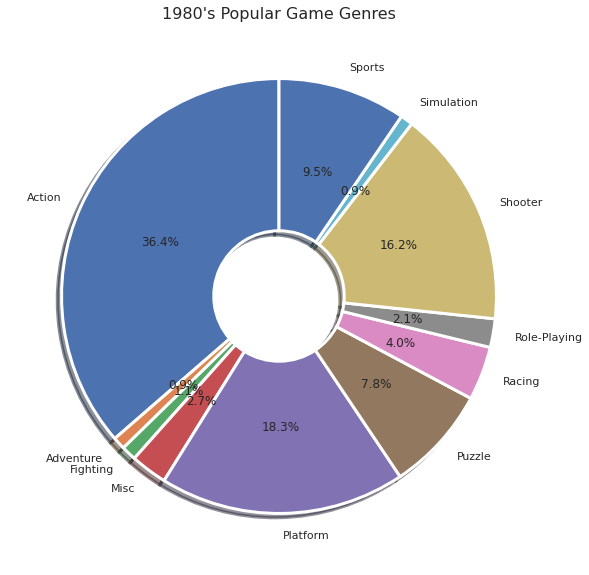

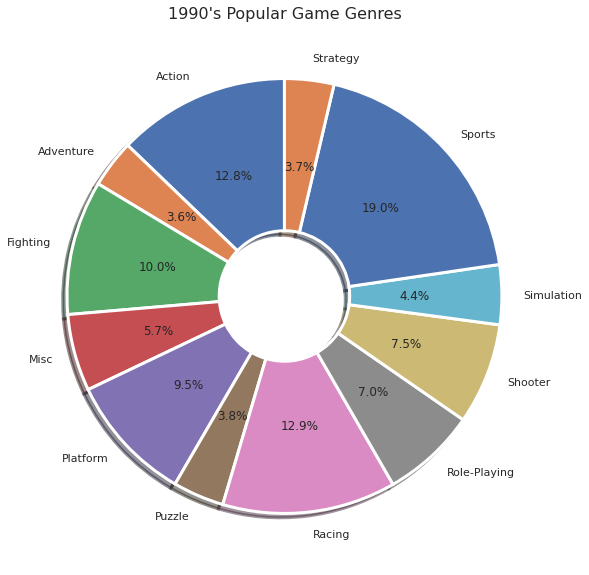

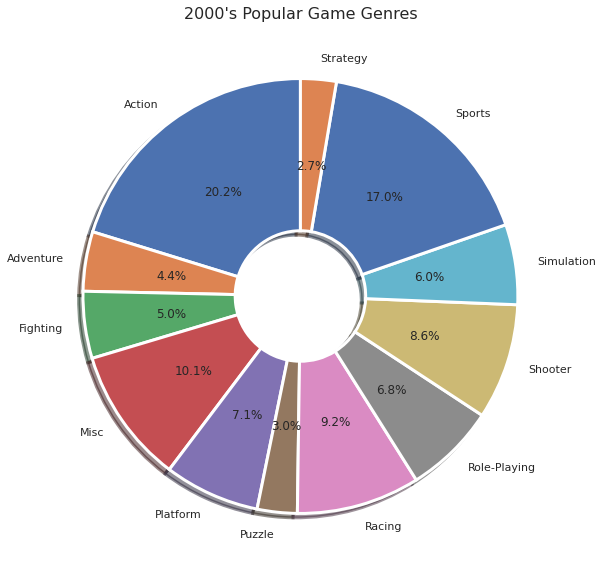

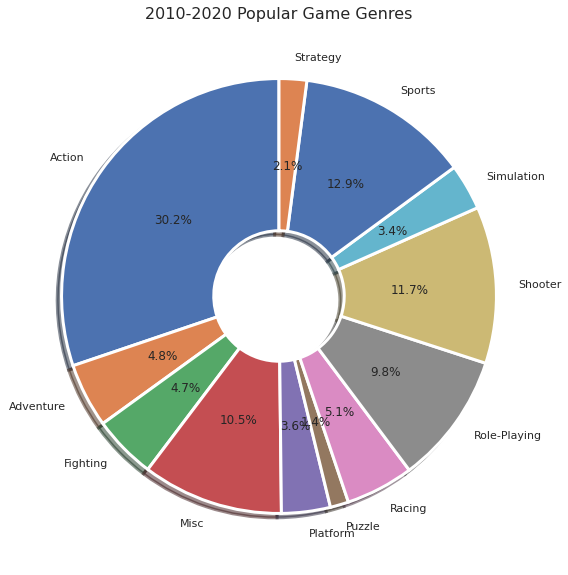

In [162]:
#연도별 인기 게임 장르 추세(글로벌)

year80 = pd.DataFrame(df[df['Year']<1990])
year90 = pd.DataFrame(df.query("(Year < 2000) and (Year >= 1990)"))
year00 = pd.DataFrame(df.query("(Year < 2010) and (Year >= 2000)"))
year10 = pd.DataFrame(df.query("(Year <= 2020) and (Year >= 2010)"))

# 1980년대
year80g = pd.DataFrame(year80.groupby('Genre')['global'].sum())
year80g.reset_index(inplace=True)
year80g_ratio = year80g['global'] / year80g['global'].sum()



x_labels = year80g['Genre']
plt.pie(year80g_ratio,
        labels=x_labels,
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90,
        counterclock=True,
        shadow=True, 
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
plt.title("1980's Popular Game Genres", fontsize=16)
plt.show()

# 1990년대
year90g = pd.DataFrame(year90.groupby('Genre')['global'].sum())
year90g.reset_index(inplace=True)
year90g_ratio = year90g['global'] / year90g['global'].sum()



x_labels = year90g['Genre']
plt.pie(year90g_ratio,
        labels=x_labels,
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90,
        counterclock=True,
        shadow=True, 
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
plt.title("1990's Popular Game Genres", fontsize=16)
plt.show()

# 2000년대
year00g = pd.DataFrame(year00.groupby('Genre')['global'].sum())
year00g.reset_index(inplace=True)
year00g_ratio = year00g['global'] / year00g['global'].sum()



x_labels = year00g['Genre']
plt.pie(year00g_ratio,
        labels=x_labels,
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90,
        counterclock=True,
        shadow=True, 
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
plt.title("2000's Popular Game Genres", fontsize=16)
plt.show()

# 2010-2020년대
year10g = pd.DataFrame(year10.groupby('Genre')['global'].sum())
year10g.reset_index(inplace=True)
year10g_ratio = year10g['global'] / year10g['global'].sum()



x_labels = year10g['Genre']
plt.pie(year10g_ratio,
        labels=x_labels,
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90,
        counterclock=True,
        shadow=True, 
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
plt.title("2010-2020 Popular Game Genres", fontsize=16)
plt.show()

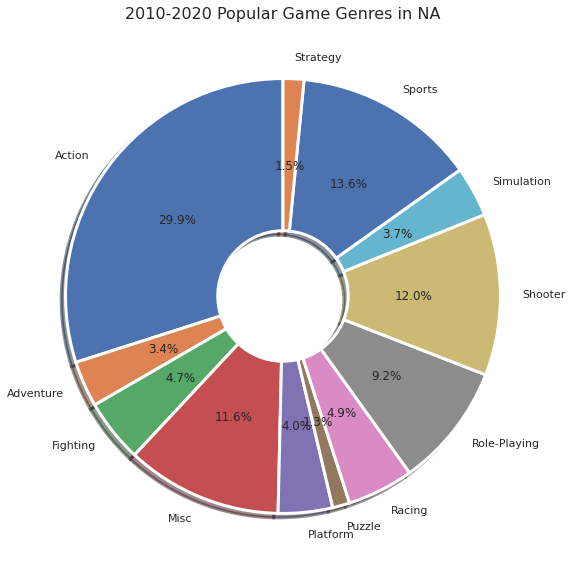

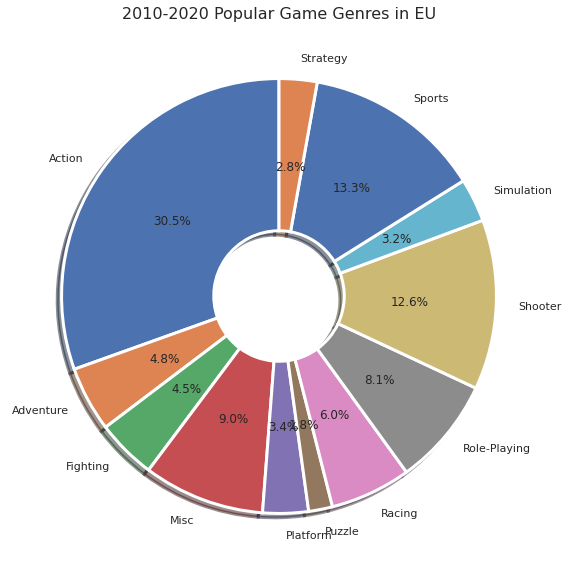

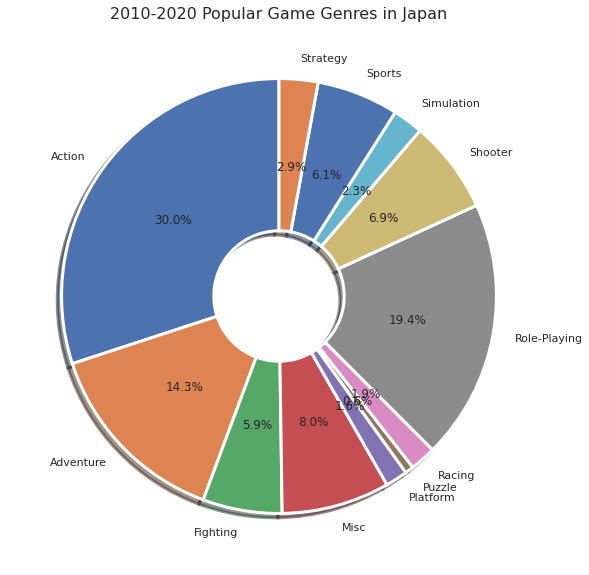

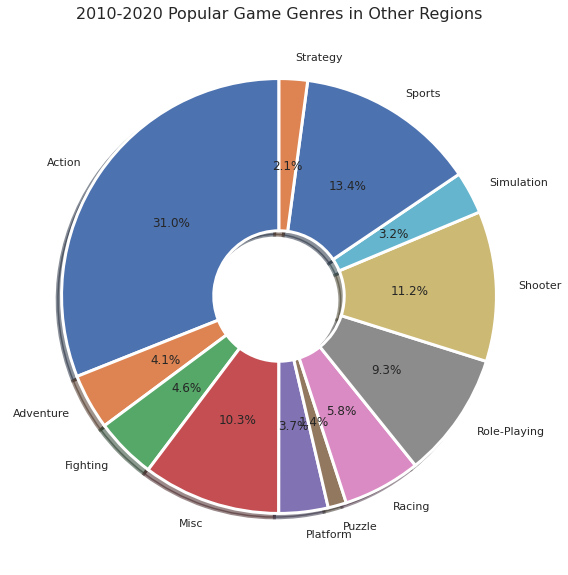

In [163]:
#최근(2010-2020) 지역별 인기 게임 장르


# 북미
year10g = pd.DataFrame(year10.groupby('Genre')['na'].sum())
year10g.reset_index(inplace=True)
year10g_ratio = year10g['na'] / year10g['na'].sum()



x_labels = year10g['Genre']
plt.pie(year10g_ratio,
        labels=x_labels,
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90,
        counterclock=True,
        shadow=True, 
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
plt.title("2010-2020 Popular Game Genres in NA", fontsize=16)
plt.show()


# EU
year10g = pd.DataFrame(year10.groupby('Genre')['eu'].sum())
year10g.reset_index(inplace=True)
year10g_ratio = year10g['eu'] / year10g['eu'].sum()



x_labels = year10g['Genre']
plt.pie(year10g_ratio,
        labels=x_labels,
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90,
        counterclock=True,
        shadow=True, 
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
plt.title("2010-2020 Popular Game Genres in EU", fontsize=16)
plt.show()


# japan
year10g = pd.DataFrame(year10.groupby('Genre')['jp'].sum())
year10g.reset_index(inplace=True)
year10g_ratio = year10g['jp'] / year10g['jp'].sum()



x_labels = year10g['Genre']
plt.pie(year10g_ratio,
        labels=x_labels,
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90,
        counterclock=True,
        shadow=True, 
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
plt.title("2010-2020 Popular Game Genres in Japan", fontsize=16)
plt.show()

# etc
year10g = pd.DataFrame(year10.groupby('Genre')['other'].sum())
year10g.reset_index(inplace=True)
year10g_ratio = year10g['other'] / year10g['other'].sum()



x_labels = year10g['Genre']
plt.pie(year10g_ratio,
        labels=x_labels,
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90,
        counterclock=True,
        shadow=True, 
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
plt.title("2010-2020 Popular Game Genres in Other Regions", fontsize=16)
plt.show()

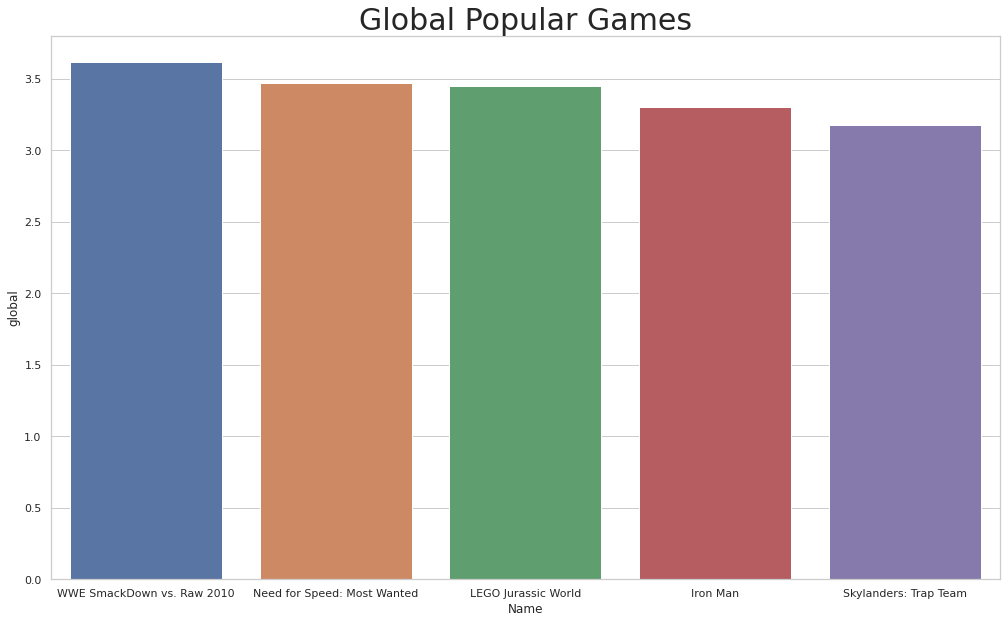

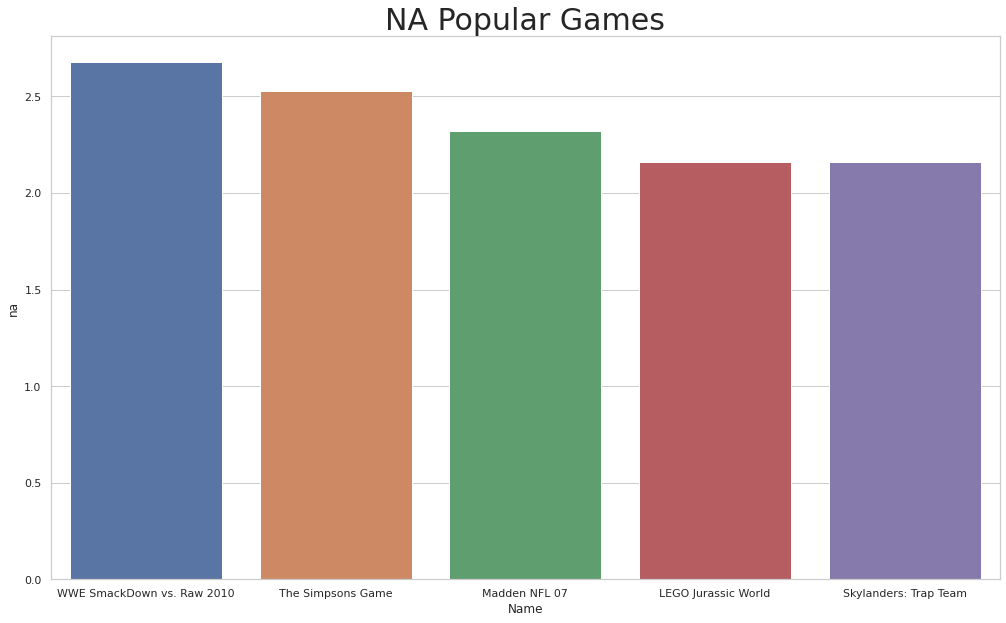

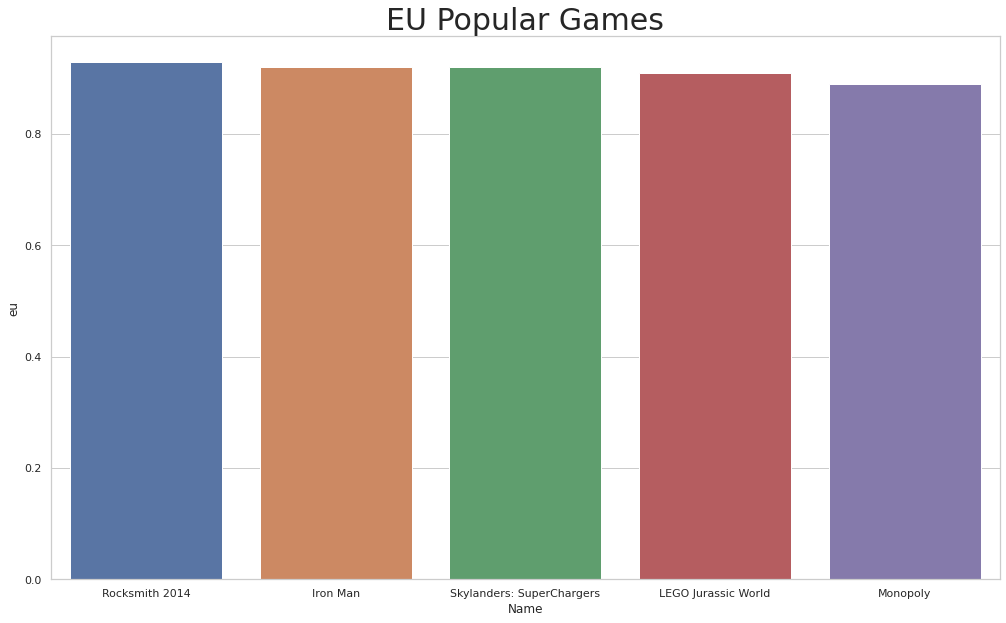

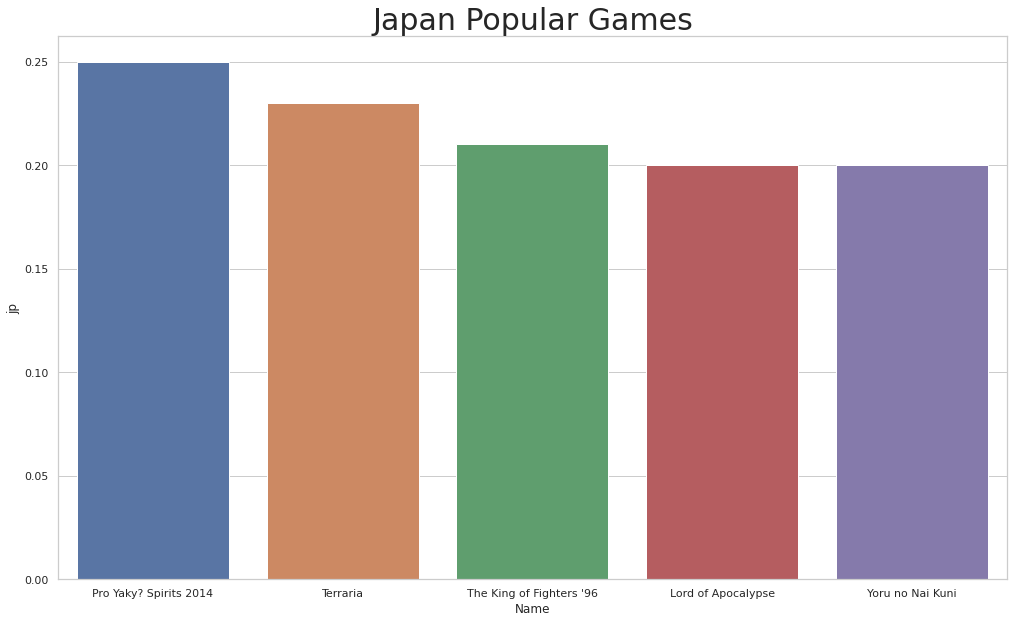

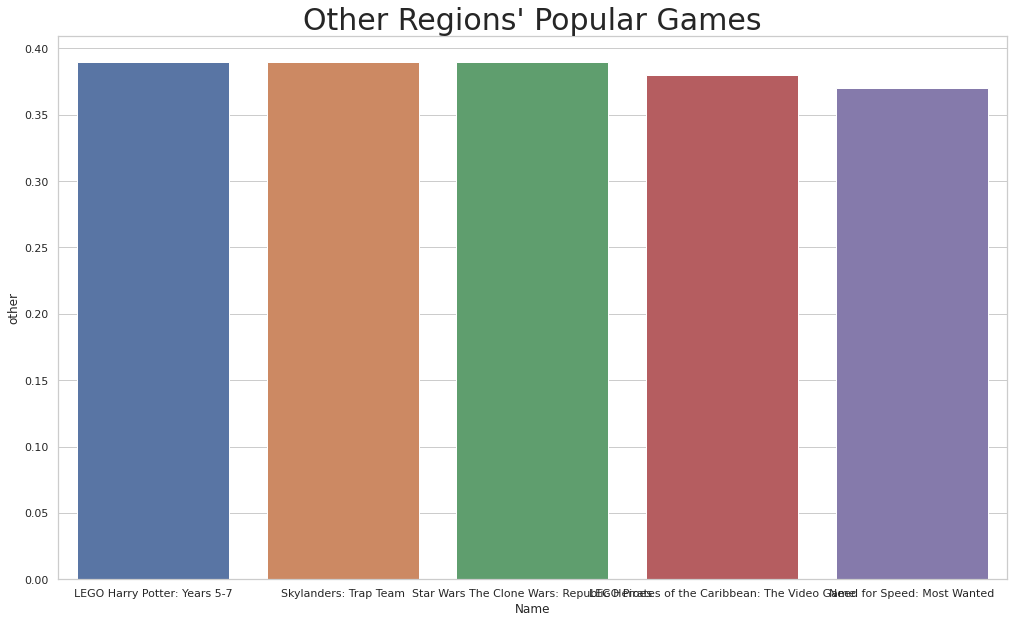

In [164]:
#인기가 많은 게임(출고량)

# 글로벌
global_p = pd.DataFrame(df.groupby('Name')['global'].sum())
global_p.reset_index(inplace=True)
global_p = global_p.nlargest(5, 'global')

sns.set(rc={'figure.figsize':(17,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=global_p['Name'], y=global_p["global"], data=global_p)
plt.title('Global Popular Games', fontsize=30)
plt.show()

# 북미
na_p = pd.DataFrame(df.groupby('Name')['na'].sum())
na_p.reset_index(inplace=True)
na_p = na_p.nlargest(5, 'na')

sns.set(rc={'figure.figsize':(17,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=na_p['Name'], y=na_p["na"], data=na_p)
plt.title('NA Popular Games', fontsize=30)

plt.show()

# eu
eu_p = pd.DataFrame(df.groupby('Name')['eu'].sum())
eu_p.reset_index(inplace=True)
eu_p = eu_p.nlargest(5, 'eu')

sns.set(rc={'figure.figsize':(17,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=eu_p['Name'], y=eu_p["eu"], data=eu_p)
plt.title('EU Popular Games', fontsize=30)

plt.show()


# jp
jp_p = pd.DataFrame(df.groupby('Name')['jp'].sum())
jp_p.reset_index(inplace=True)
jp_p = jp_p.nlargest(5, 'jp')

sns.set(rc={'figure.figsize':(17,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=jp_p['Name'], y=jp_p["jp"], data=jp_p)
plt.title('Japan Popular Games', fontsize=30)

plt.show()

# other
other_p = pd.DataFrame(df.groupby('Name')['other'].sum())
other_p.reset_index(inplace=True)
other_p = other_p.nlargest(5, 'other')

sns.set(rc={'figure.figsize':(17,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=other_p['Name'], y=other_p["other"], data=other_p)
plt.title("Other Regions' Popular Games", fontsize=30)

plt.show()


1.4440964065083095


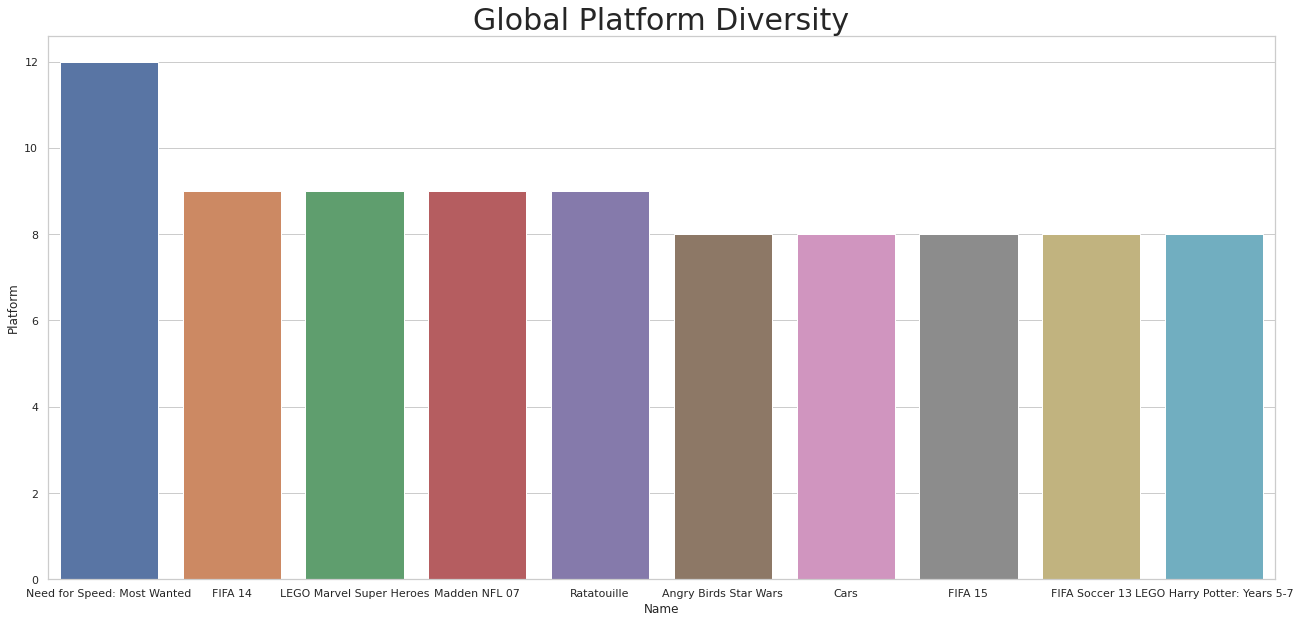

In [167]:
# 인기가 믾은 게임(다양한 플랫폼 진출)

# 글로벌
global_v = pd.DataFrame(df.groupby('Name')['Platform'].count())
global_v.reset_index(inplace=True)
print(global_v['Platform'].mean())
global_v = global_v.nlargest(10, 'Platform')

sns.set(rc={'figure.figsize':(22,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=global_v['Name'], y=global_v["Platform"], data=global_v)
plt.title('Global Platform Diversity', fontsize=30)
plt.show()




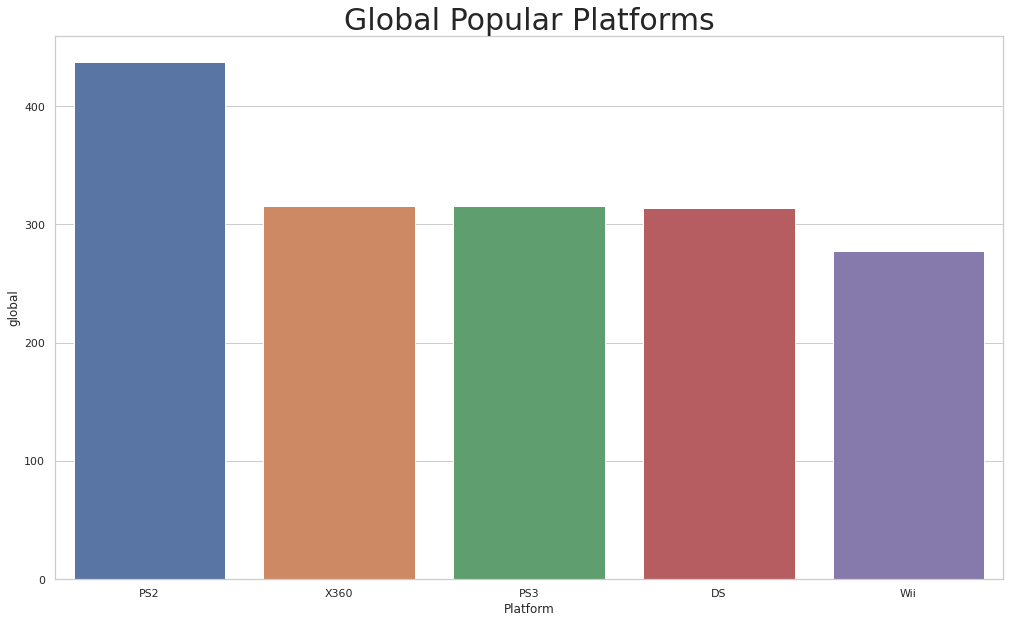

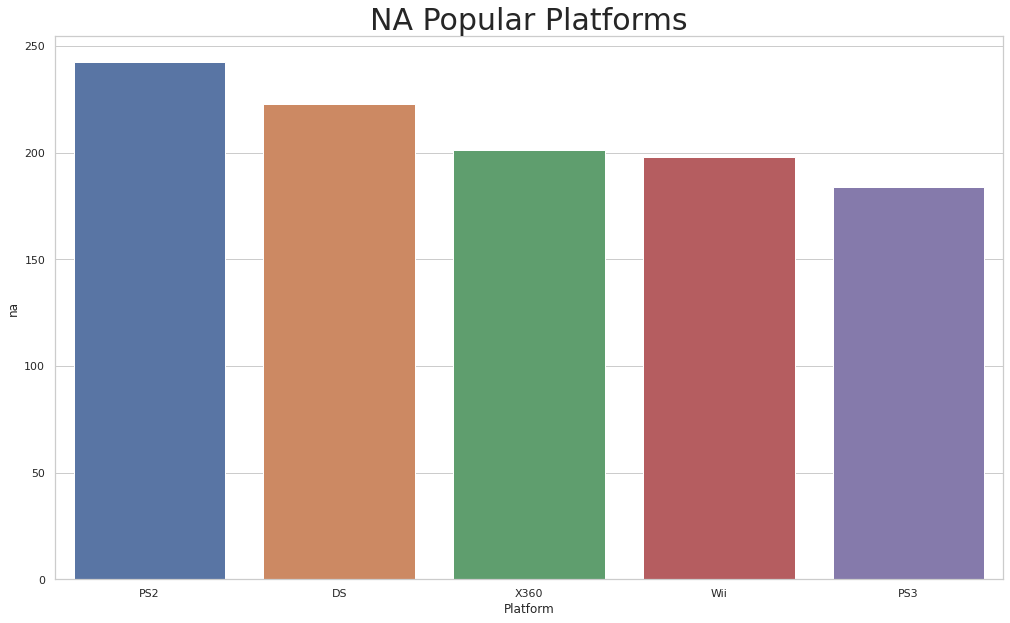

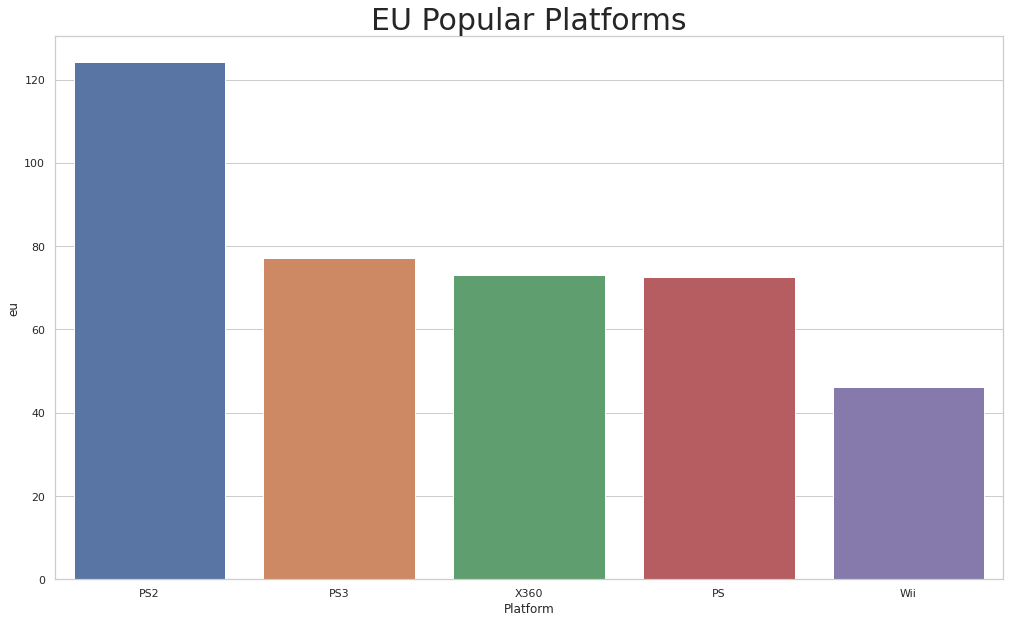

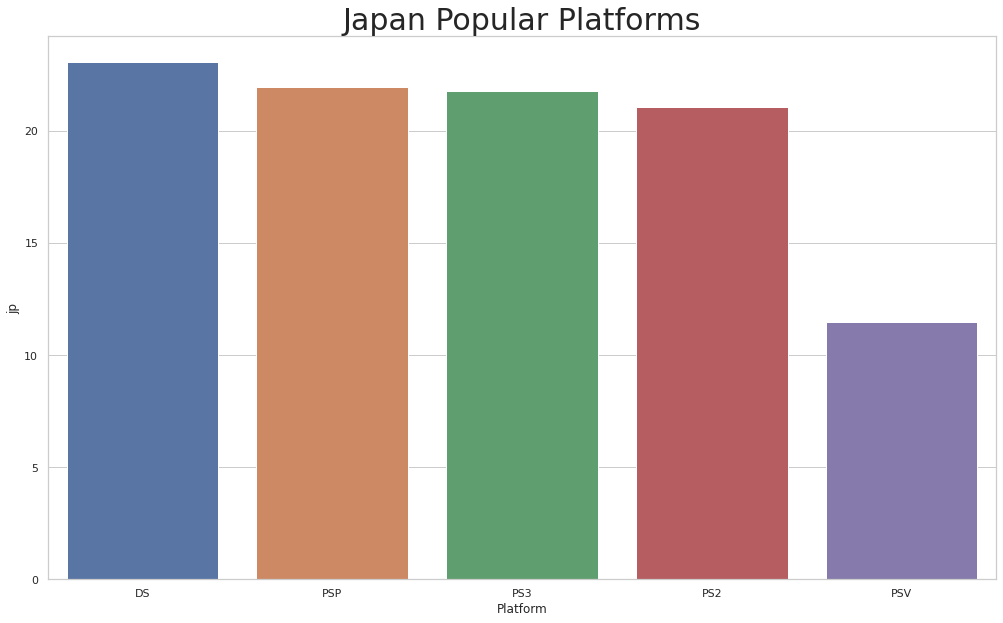

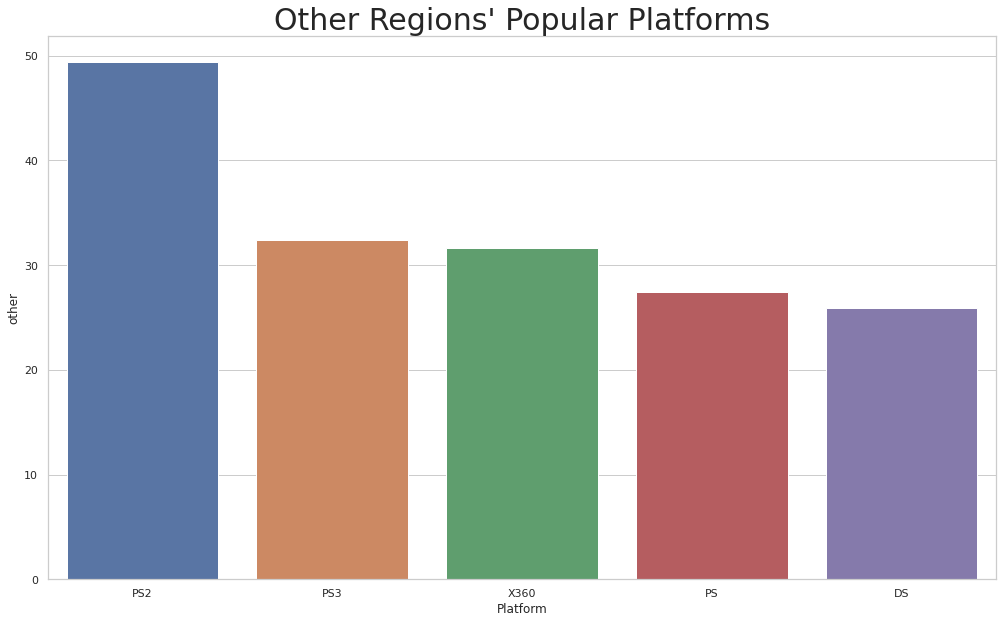

In [168]:
# 플랫폼별 수익

# 글로벌
global_pl = pd.DataFrame(df.groupby('Platform')['global'].sum())
global_pl.reset_index(inplace=True)
global_pl = global_pl.nlargest(5, 'global')

sns.set(rc={'figure.figsize':(17,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=global_pl['Platform'], y=global_pl["global"], data=global_pl)
plt.title('Global Popular Platforms', fontsize=30)
plt.show()

# 북미
na_pl = pd.DataFrame(df.groupby('Platform')['na'].sum())
na_pl.reset_index(inplace=True)
na_pl = na_pl.nlargest(5, 'na')

sns.set(rc={'figure.figsize':(17,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=na_pl['Platform'], y=na_pl["na"], data=na_pl)
plt.title('NA Popular Platforms', fontsize=30)

plt.show()

# eu
eu_pl = pd.DataFrame(df.groupby('Platform')['eu'].sum())
eu_pl.reset_index(inplace=True)
eu_pl = eu_pl.nlargest(5, 'eu')

sns.set(rc={'figure.figsize':(17,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=eu_pl['Platform'], y=eu_pl["eu"], data=eu_pl)
plt.title('EU Popular Platforms', fontsize=30)

plt.show()


# jp
jp_pl = pd.DataFrame(df.groupby('Platform')['jp'].sum())
jp_pl.reset_index(inplace=True)
jp_pl = jp_pl.nlargest(5, 'jp')

sns.set(rc={'figure.figsize':(17,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=jp_pl['Platform'], y=jp_pl["jp"], data=jp_pl)
plt.title('Japan Popular Platforms', fontsize=30)

plt.show()

# other
other_pl = pd.DataFrame(df.groupby('Platform')['other'].sum())
other_pl.reset_index(inplace=True)
other_pl = other_pl.nlargest(5, 'other')

sns.set(rc={'figure.figsize':(17,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=other_pl['Platform'], y=other_pl["other"], data=other_pl)
plt.title("Other Regions' Popular Platforms", fontsize=30)

plt.show()




    Year  global
0   1980       9
1   1981      46
2   1982      36
3   1983      17
4   1984      14
5   1985      14
6   1986      21
7   1987      16
8   1988      15
9   1989      17
10  1990      16
11  1991      41
12  1992      43
13  1993      60
14  1994     121
15  1995     219
16  1996     263
17  1997     289
18  1998     379
19  1999     338
20  2000     349
21  2001     482
22  2002     829
23  2003     775
24  2004     763
25  2005     941
26  2006    1008
27  2007    1472
28  2008    1428
29  2009    1431
30  2010    1259
31  2011    1139
32  2012     657
33  2013     546
34  2014     582
35  2015     614
36  2016     344
37  2017       3
38  2020       1


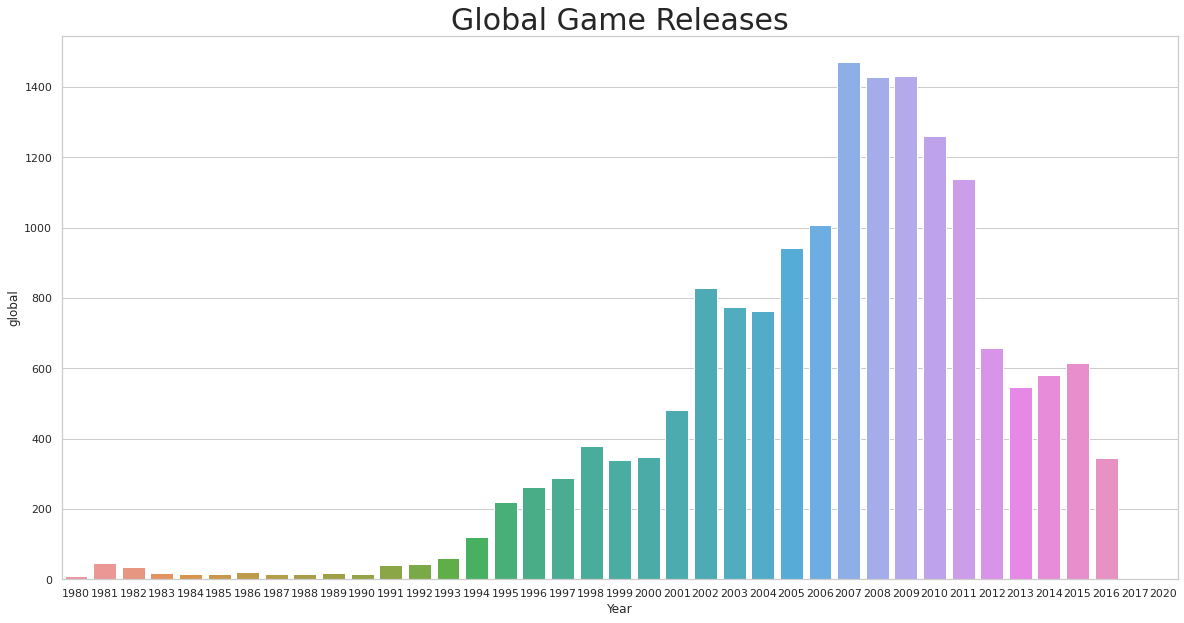

In [169]:
###게임 출시 건수

#글로벌
numbers_g = pd.DataFrame(df.groupby('Year')['global'].count())
numbers_g.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=numbers_g['Year'], y=numbers_g["global"], data=numbers_g)
plt.title('Global Game Releases', fontsize=30)
plt.xticks()
plt.show()